In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

%matplotlib inline

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

sns.set(style="darkgrid") # seteando tipo de grid en seaborn


In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [20]:
df = pd.read_csv('data/train.csv', dtype = {'piscina':'int32', 'gimnasio':'int32', 'usosmultiples':'int32', 'escuelascercanas':'int32',
                                         'centroscomercialescercanos':'int32', 'precio':'int32', 'id':'int32'},parse_dates = ['fecha'])

In [21]:
#Quito todos los NaN y los pasa a valor 0
df = df.replace(np.nan, 0)

In [22]:
#Continuar casteando valores que ocupan demasiada memoria (ahora puedo hacerlo en aquellos que tenian NaN)
df = df.astype({'banos':'int32', 'antiguedad':'int32', 'garages':'int32', 'habitaciones':'int32', 'metroscubiertos':'int32', 'metrostotales':'int32',
                    'idzona':'int32'})

In [23]:
#Establecer como category el tipo de propiedad
categorias = df['tipodepropiedad']
categorias = categorias.astype('category').dtypes
df = df.astype({'tipodepropiedad':'category'})

# Empiezo a trabajar:

In [24]:
#Me quedo solo con las columnas que pienso usar
df=df[['id','titulo','descripcion','precio']]

In [25]:
df.head()

,id,titulo,descripcion,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",2273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",3600000
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,1200000
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,650000
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,1150000


[[<matplotlib.axis.XTick at 0x7f59babbe0b8>,

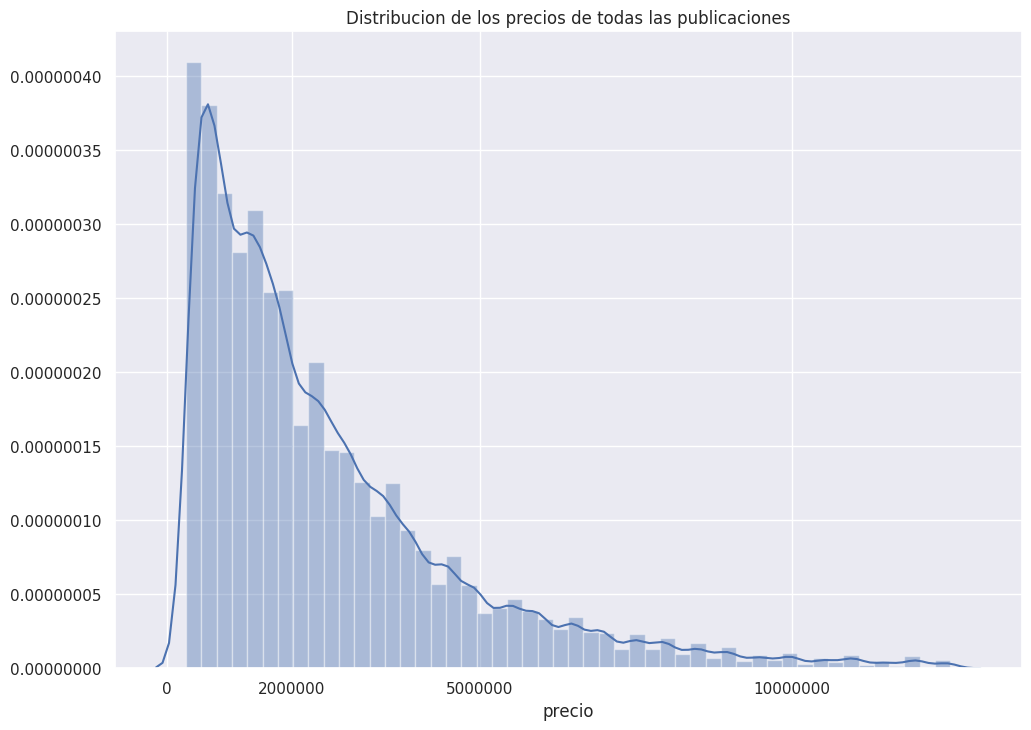

In [26]:
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plot=sns.distplot(df['precio'])
plot.set_title("Distribucion de los precios de todas las publicaciones")
plot.set(xticks=(0,2000000,5000000,10000000))


Divido en 3 grupos de precios:
* Grupo 1: menor a 2000000
* Grupo 2: entre 2000000 y 5000000
* Grupo 3: mayor a 5000000

In [27]:
df_1=df[df['precio']<2000000]

df_2=df[ (df['precio']>2000000) & (df['precio']<5000000) ]

df_3=df[(df['precio']>5000000)]

# ¿Cuales son las palabras que más aparecen en los titulos?
# ¿Las palabras de los titulos cambian segun el grupo?

In [28]:
#Funcion para contar palabras en una columna
from collections import Counter
def contar_palabras_en_columna(dataframe,columna):
    #Hacemos una lista con todas las palabras que aparecen en los titulos 
    #y sus apariciones, sacando los chars "( ) ,"
    contador_palabras_avisos = Counter(" ".join(map(str,dataframe[columna].\
    values.tolist())).lower().replace("\n",' ').replace("(",'').replace(")",'').replace(".",' ').replace(",",' ').split(" ")).items()

    #Formo un DF con esa lista

    contador_palabras_avisos = list(contador_palabras_avisos)


    contador_palabras_avisos_df = pd.DataFrame(contador_palabras_avisos)
    contador_palabras_avisos_df.head()

    contador_palabras_avisos_df.columns=['palabra','apariciones']
    contador_palabras_avisos_df=contador_palabras_avisos_df.set_index('palabra')

    #Saco las palabras triviales del df (fui encontrandolas a medida que ploteaba los resultados)
    triviales=['','-','de','con','en','y','o','a','para','la','las','al','el','los','/','por','del','san','santa','0','1','2','3','4','que','se','un','una','dos','te','no','es','tu','su','muy','m2']
    contador_palabras_avisos_df=contador_palabras_avisos_df.drop(triviales)
    
    return contador_palabras_avisos_df.sort_values(by='apariciones',ascending=False)

    

In [29]:
datos=contar_palabras_en_columna(df,'titulo').head(18)


In [30]:
datos.head()

,apariciones
palabra,
casa,121303
venta,104389
departamento,38074
excelente,12255
lomas,11160


Text(0, 0.5, 'Palabras')

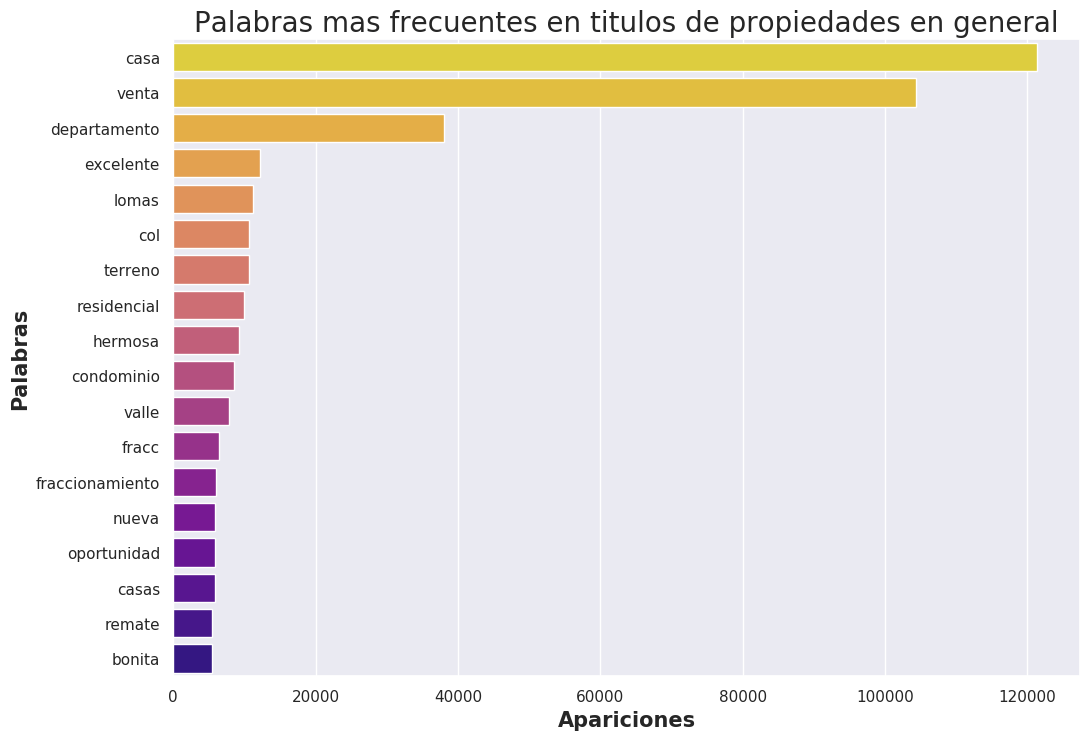

In [31]:

plot=sns.barplot(y=datos['apariciones'].index,x=datos['apariciones'].values,orient='h',palette="plasma_r")
plot.set_title('Palabras mas frecuentes en titulos de propiedades en general', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

# Titulos Grupo 1

In [32]:
datos=contar_palabras_en_columna(df_1,'titulo').head(18)

Text(0, 0.5, 'Palabras')

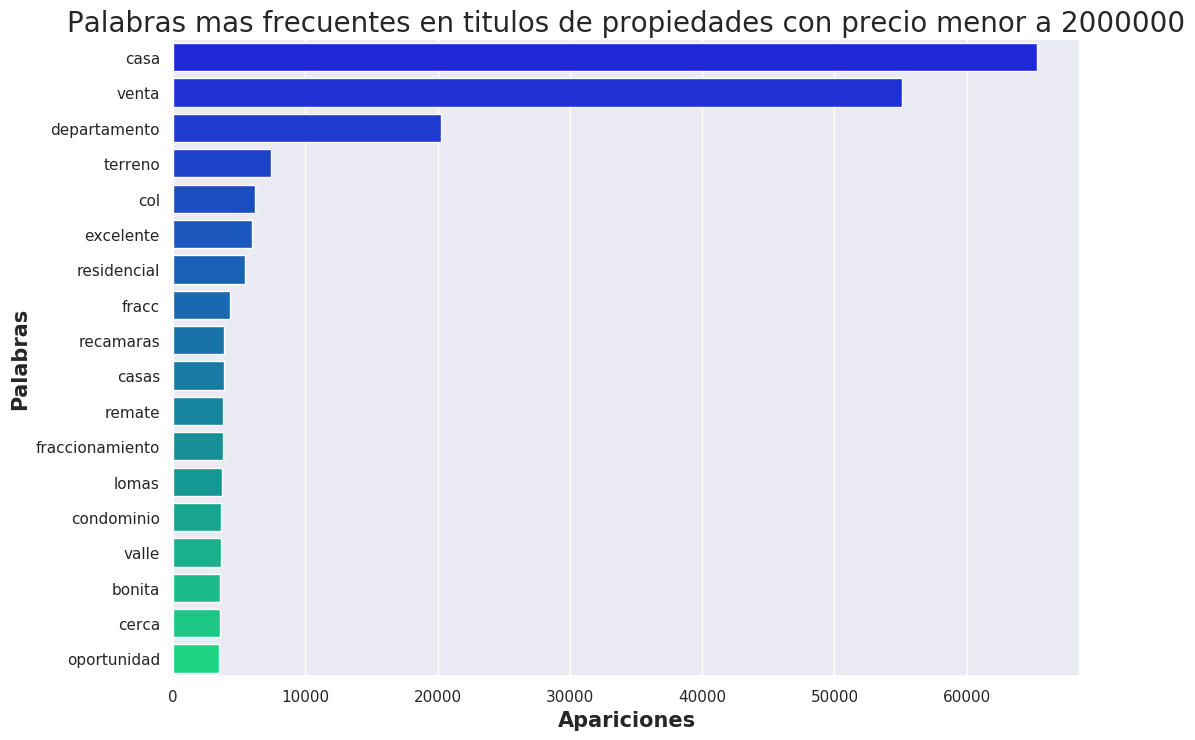

In [33]:
plot=sns.barplot(y=datos['apariciones'].index,x=datos['apariciones'].values,orient='h',palette="winter")
plot.set_title('Palabras mas frecuentes en titulos de propiedades con precio menor a 2000000', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

# Titulos Grupo 2

In [34]:
datos=contar_palabras_en_columna(df_2,'titulo').head(18)

Text(0, 0.5, 'Palabras')

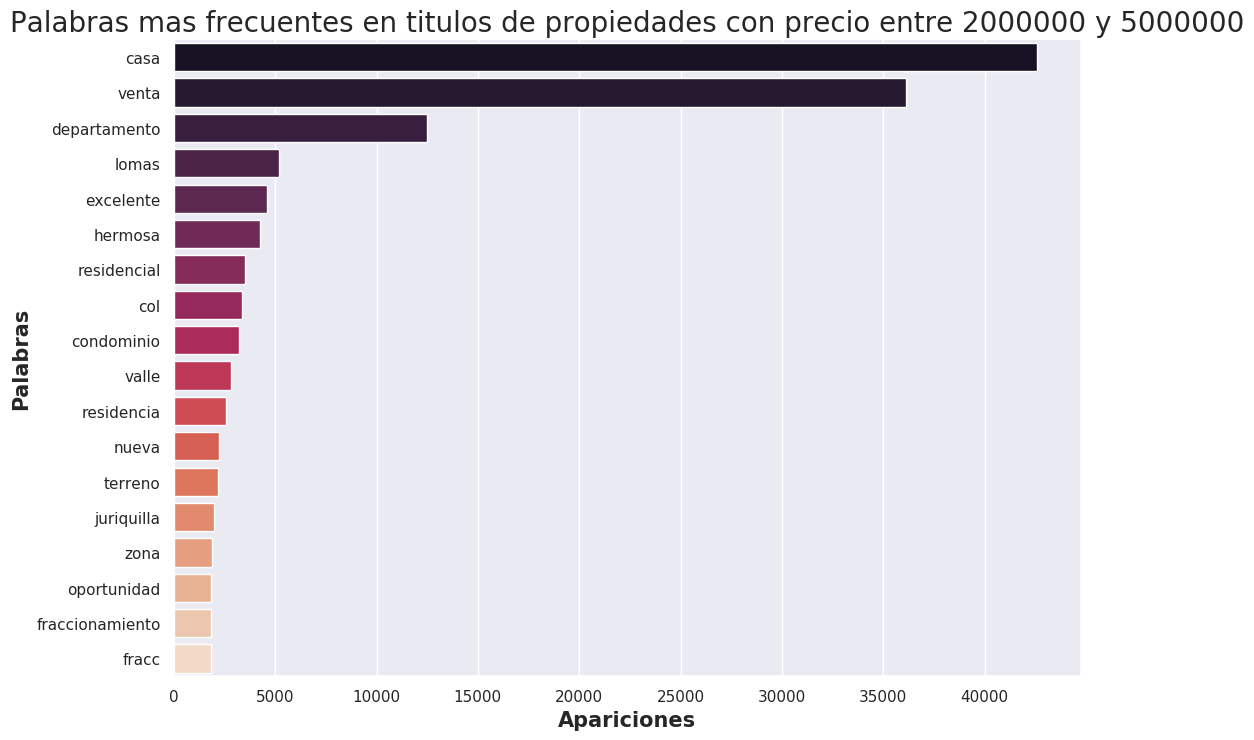

In [35]:
plot=sns.barplot(y=datos['apariciones'].index,x=datos['apariciones'].values,orient='h',palette="rocket")
plot.set_title('Palabras mas frecuentes en titulos de propiedades con precio entre 2000000 y 5000000', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

# Titulos Grupo 3

In [36]:
datos=contar_palabras_en_columna(df_3,'titulo').head(18)

Text(0, 0.5, 'Palabras')

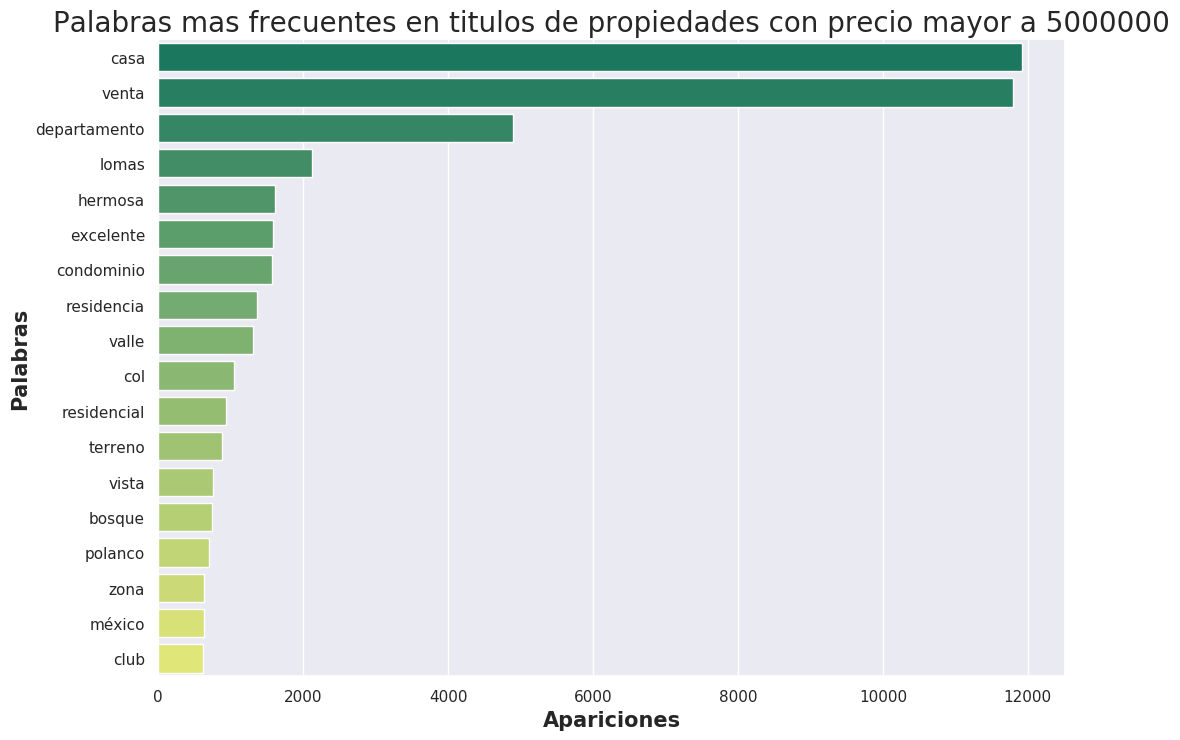

In [37]:
plot=sns.barplot(y=datos['apariciones'].index,x=datos['apariciones'].values,orient='h',palette="summer")
plot.set_title('Palabras mas frecuentes en titulos de propiedades con precio mayor a 5000000', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

Conclusion: Las palabra casa, venta y departamento aparecen muy frecuentemente en todos los grupos. No se ven diferencias muy significativas entre las palabras de los titulos con este metodo

# ¿Cuales son las palabras que más aparecen en las descripciones? ¿Cambian segun el grupo?

Hago el mismo analisis anterior pero para descripciones

In [38]:
datos=contar_palabras_en_columna(df,'descripcion').head(18)

Text(0, 0.5, 'Palabras')

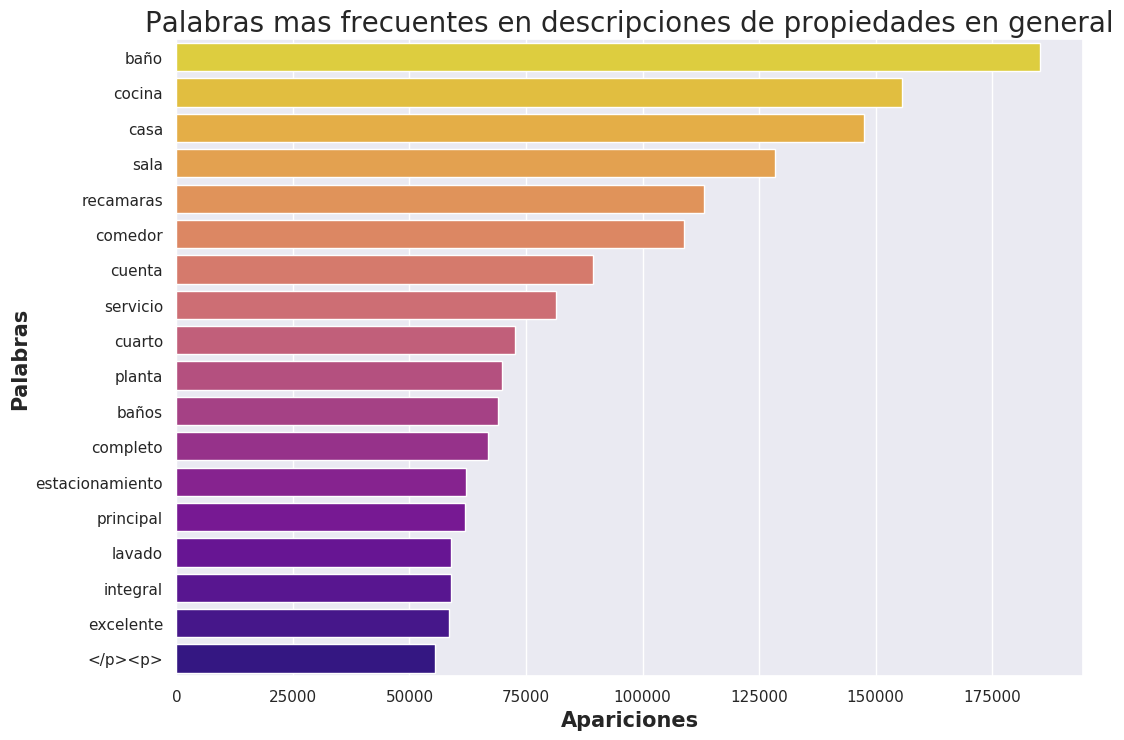

In [39]:
plot=sns.barplot(y=datos['apariciones'].index,x=datos['apariciones'].values,orient='h',palette="plasma_r")
plot.set_title('Palabras mas frecuentes en descripciones de propiedades en general', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

In [40]:
datos=contar_palabras_en_columna(df_1,'descripcion').head(18)

Text(0, 0.5, 'Palabras')

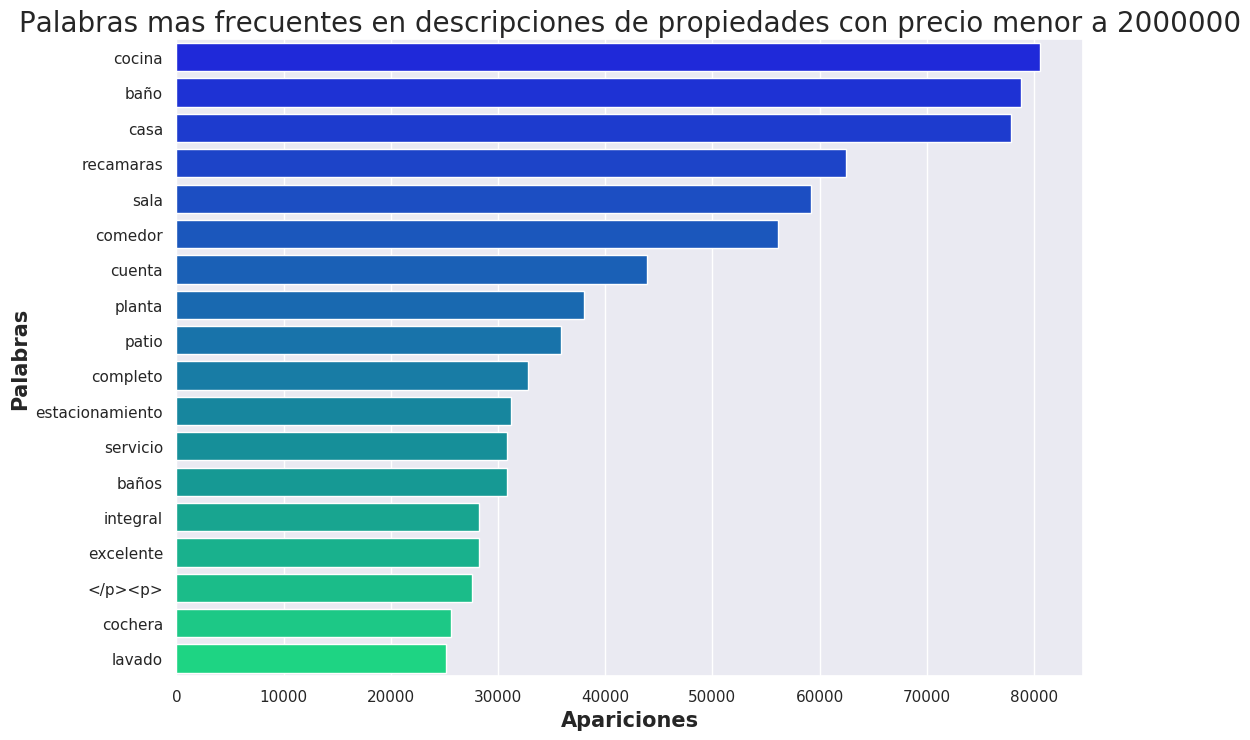

In [41]:
plot=sns.barplot(y=datos['apariciones'].index,x=datos['apariciones'].values,orient='h',palette="winter")
plot.set_title('Palabras mas frecuentes en descripciones de propiedades con precio menor a 2000000', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

In [42]:
datos=contar_palabras_en_columna(df_2,'descripcion').head(18)

Text(0, 0.5, 'Palabras')

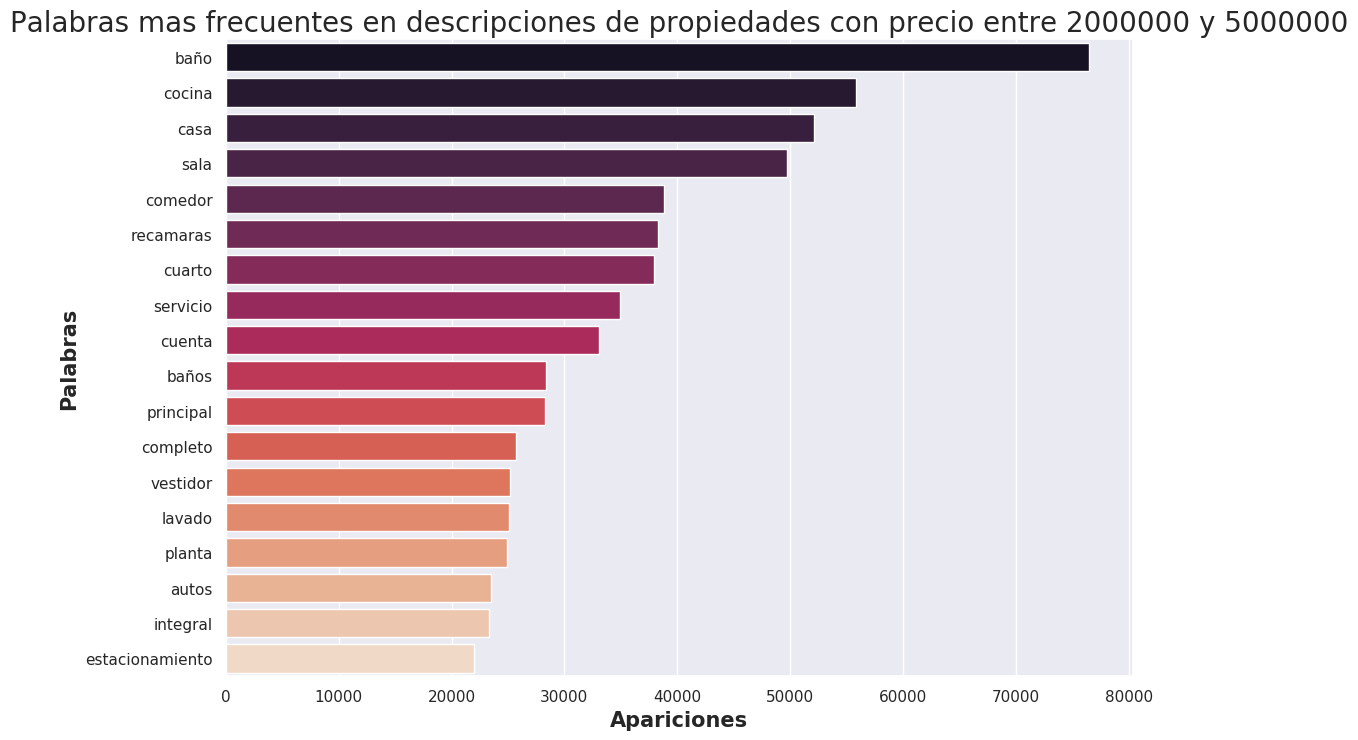

In [43]:
plot=sns.barplot(y=datos['apariciones'].index,x=datos['apariciones'].values,orient='h',palette="rocket")
plot.set_title('Palabras mas frecuentes en descripciones de propiedades con precio entre 2000000 y 5000000', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

In [44]:
datos=contar_palabras_en_columna(df_3,'descripcion').head(18)

Text(0, 0.5, 'Palabras')

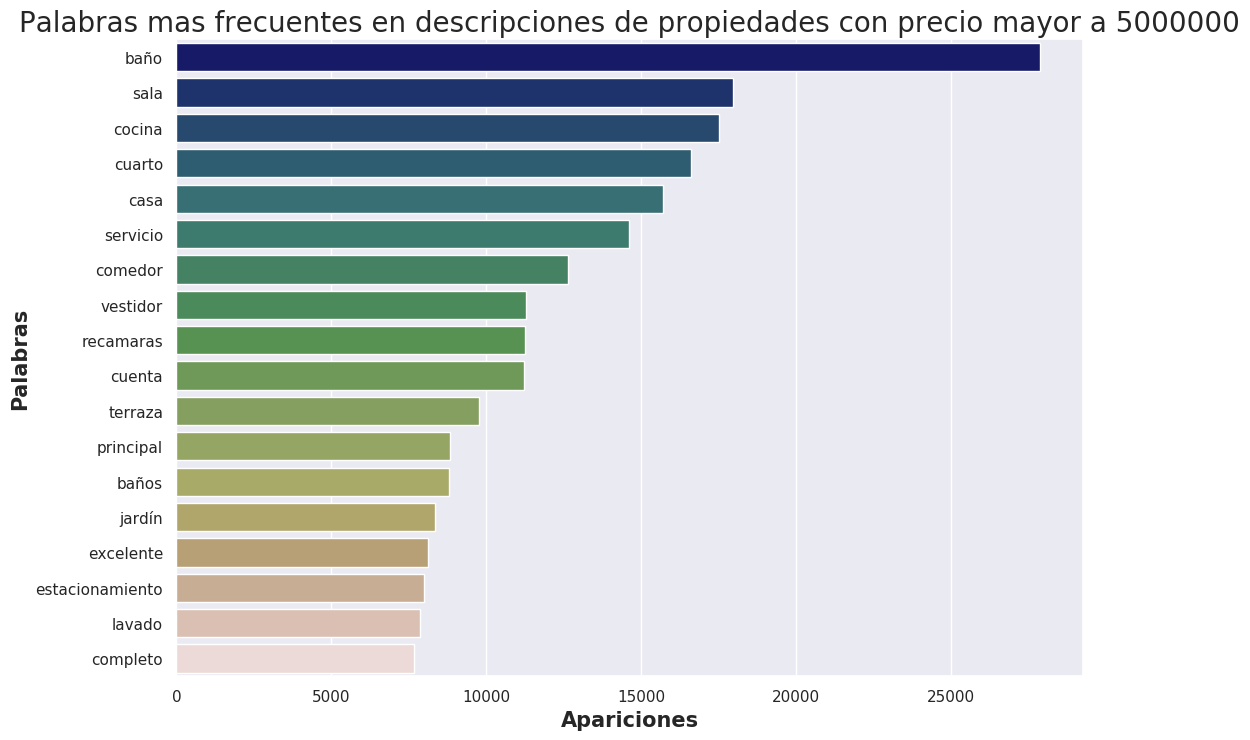

In [45]:
plot=sns.barplot(y=datos['apariciones'].index,x=datos['apariciones'].values,orient='h',palette="gist_earth")
plot.set_title('Palabras mas frecuentes en descripciones de propiedades con precio mayor a 5000000', fontsize = 20)
plot.set_xlabel('Apariciones', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

**Conclusiones:**
Se puede observar que:
* La palabra 'baño' aparece masomenos en casi todas las propiedades sin importar el precio
* Idem para las palabras 'excelente' 'baños' 'servicio' 'cuenta' y 'lavado'
* Las palabras 'cocina' y 'casa' aparecen mucho mas en propiedades de precio menor a 2000000
* La palabra 'jardín' y 'terraza' aparece mas seguido en propiedades de precio mayor a 5000000
* Las palabras 'patio' 'cochera' solo en las de precio menor a 2000000
* Las palabras 'vestidor' y 'cuarto' no aparecen significativamente en las de precio menor a 2000000 y si en el resto
* La palabra 'estacionamiento' ' no tiene importancia en las de precio mayor a 5000000


# ¿Hay palabras que se caracterizan por aparecer en algun grupo en particular?

In [46]:
#Formo un df con todas las palabras que aparecen y su cantidad de apariciones
datos=contar_palabras_en_columna(df,'descripcion')

In [47]:
#Formo 3 dfs con las palabras que aparecen en cada grupo y su cantidad de apariciones dividido el tamaño del 
#grupo
#Nota: Divido por el tamaño del grupo para evitar que un grupo mas grande que otro se acapare todo el
#porcentaje
# de cantidad de palabras. Quiero saber como se distribuyen las palabras en cada grupo pero teniendo en cuenta que los
# tamaños de cada uno son diferentes
datos_1=contar_palabras_en_columna(df_1,'descripcion')/np.sqrt(df_1.shape[0])
datos_2=contar_palabras_en_columna(df_2,'descripcion')/np.sqrt(df_2.shape[0])
datos_3=contar_palabras_en_columna(df_3,'descripcion')/np.sqrt(df_3.shape[0])

In [48]:
datos_1.columns=['apariciones_en_grupo_1']
datos_2.columns=['apariciones_en_grupo_2']
datos_3.columns=['apariciones_en_grupo_3']

In [49]:
datos=datos.merge(datos_1,how='outer',right_index=True,left_index=True)
datos=datos.merge(datos_2,how='outer',right_index=True,left_index=True)
datos=datos.merge(datos_3,how='outer',right_index=True,left_index=True)

In [50]:
datos.head()

,apariciones,apariciones_en_grupo_1,apariciones_en_grupo_2,apariciones_en_grupo_3
palabra,,,,
a,1,NaN,0.003501,NaN
,1,0.002799,NaN,NaN
\t,486,0.685675,0.574234,0.449917
\t\t,31,0.036383,0.038516,0.041992
\t\t\t,66,0.044779,0.136556,0.065988


In [51]:
datos.shape

(208073, 4)

In [52]:
datos[datos['apariciones']>=500].shape

(2113, 4)

**Son pocas las palabras que se repiten mas de 500 veces. Me quedo con esas palabras**

In [53]:
datos=datos[datos['apariciones']>=500]

In [54]:
datos.head()

,apariciones,apariciones_en_grupo_1,apariciones_en_grupo_2,apariciones_en_grupo_3
palabra,,,,
\r,34436,66.605620,29.667614,10.983979
!,1084,1.723983,1.221999,0.605889
!!,1495,2.395664,1.726205,0.755861
!!!,1315,2.087810,1.421580,0.917831
#,705,1.438518,0.521713,0.215960


In [55]:
datos['total_apariciones']=datos['apariciones']
datos['apariciones']=(datos['apariciones_en_grupo_1']+datos['apariciones_en_grupo_2']+datos['apariciones_en_grupo_3'])

In [56]:
#Saco el porcentaje de apariciones de cada palabra en cada grupo (previamente habiendo tenido en cuenta
# que los tamaños de cada grupo son diferentes)
datos['apariciones_en_grupo_1']=datos['apariciones_en_grupo_1']/(datos['apariciones'])
datos['apariciones_en_grupo_2']=datos['apariciones_en_grupo_2']/(datos['apariciones'])
datos['apariciones_en_grupo_3']=datos['apariciones_en_grupo_3']/(datos['apariciones'])

In [57]:
datos.drop('apariciones',axis=1,inplace=True)
datos.head()

,apariciones_en_grupo_1,apariciones_en_grupo_2,apariciones_en_grupo_3,total_apariciones
palabra,,,,
\r,0.620990,0.276603,0.102408,34436
!,0.485373,0.344044,0.170583,1084
!!,0.491143,0.353895,0.154962,1495
!!!,0.471585,0.321100,0.207315,1315
#,0.661026,0.239737,0.099238,705


## Palabras que se destacaron por aparecer en el grupo 1 (precio menor a 2000000)

Text(0, 0.5, 'Porcentaje de Apariciones')

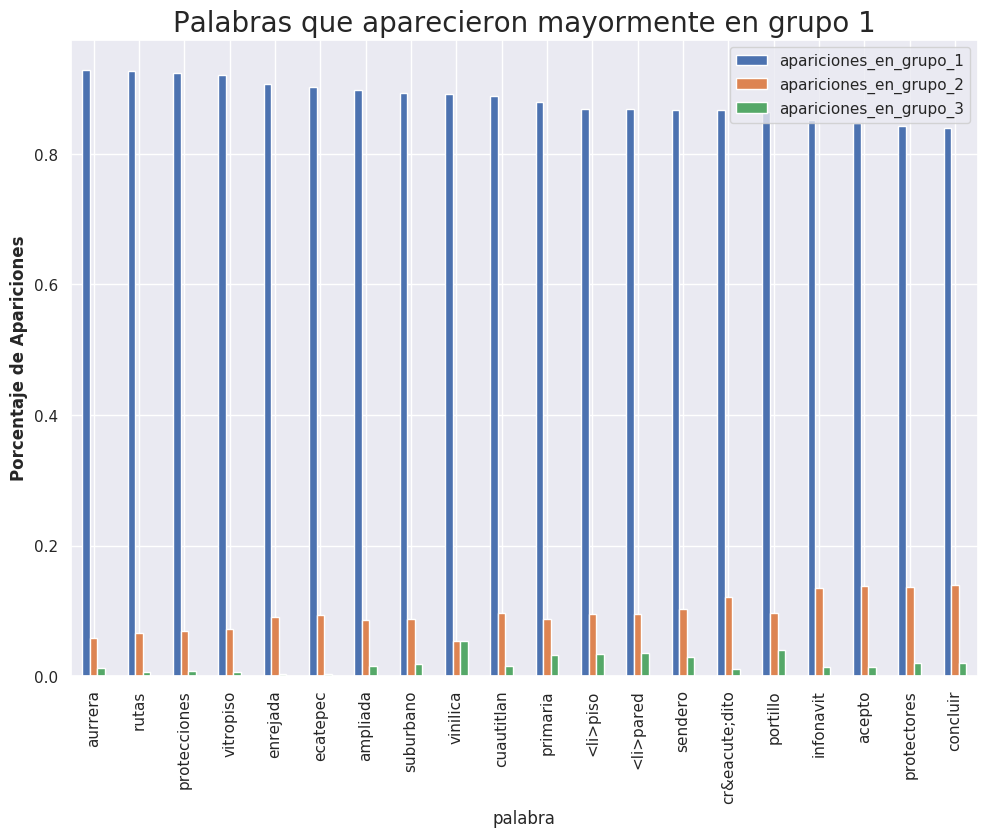

In [59]:
 
ax = datos.sort_values(by='apariciones_en_grupo_1',ascending=False).head(20).plot(kind='bar', y=["apariciones_en_grupo_1", "apariciones_en_grupo_2","apariciones_en_grupo_3"])
ax.set_title('Palabras que aparecieron mayormente en grupo 1',size=20)
ax.set_ylabel('Porcentaje de Apariciones',weight='bold')

## Palabras que se destacaron por aparecer en el grupo 2 (precio entre 2000000 y 5000000)

Text(0, 0.5, 'Porcentaje de Apariciones')

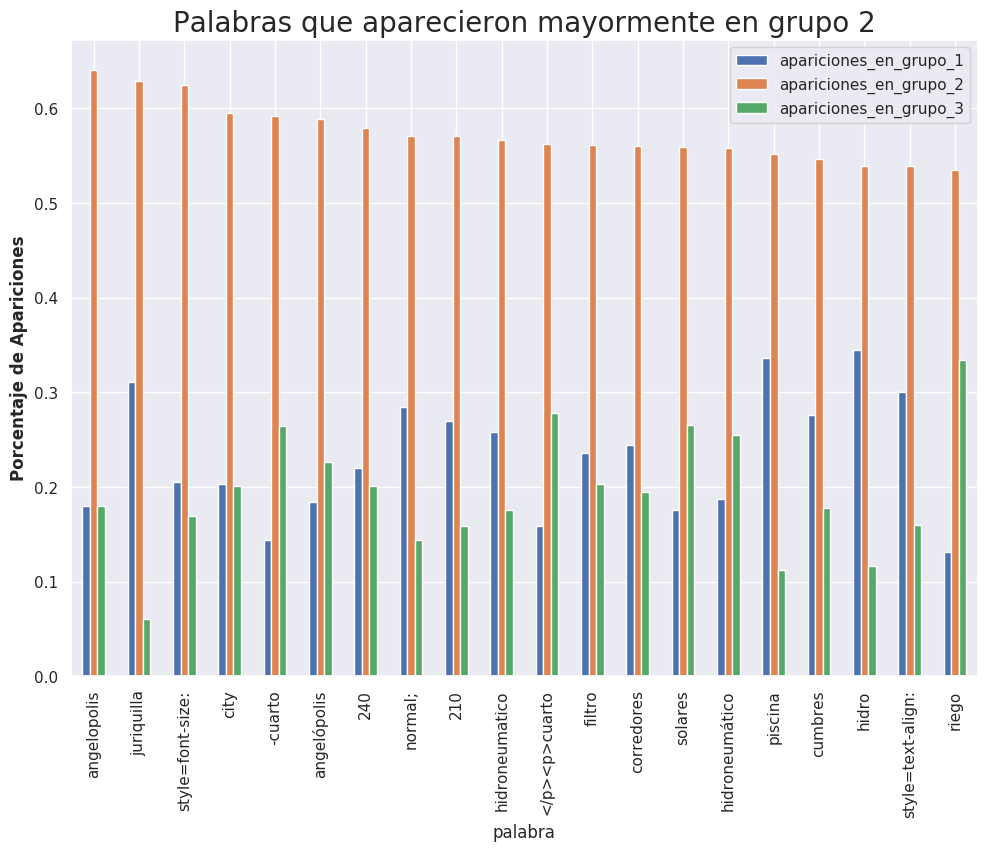

In [60]:
 ax = datos.sort_values(by='apariciones_en_grupo_2',ascending=False).head(20).plot(kind='bar', y=["apariciones_en_grupo_1", "apariciones_en_grupo_2","apariciones_en_grupo_3"])
ax.set_title('Palabras que aparecieron mayormente en grupo 2',size=20)
ax.set_ylabel('Porcentaje de Apariciones',weight='bold')

## Palabras que se destacaron por aparecer en el grupo 3 (precio mayor a 5000000)

Text(0, 0.5, 'Porcentaje de Apariciones')

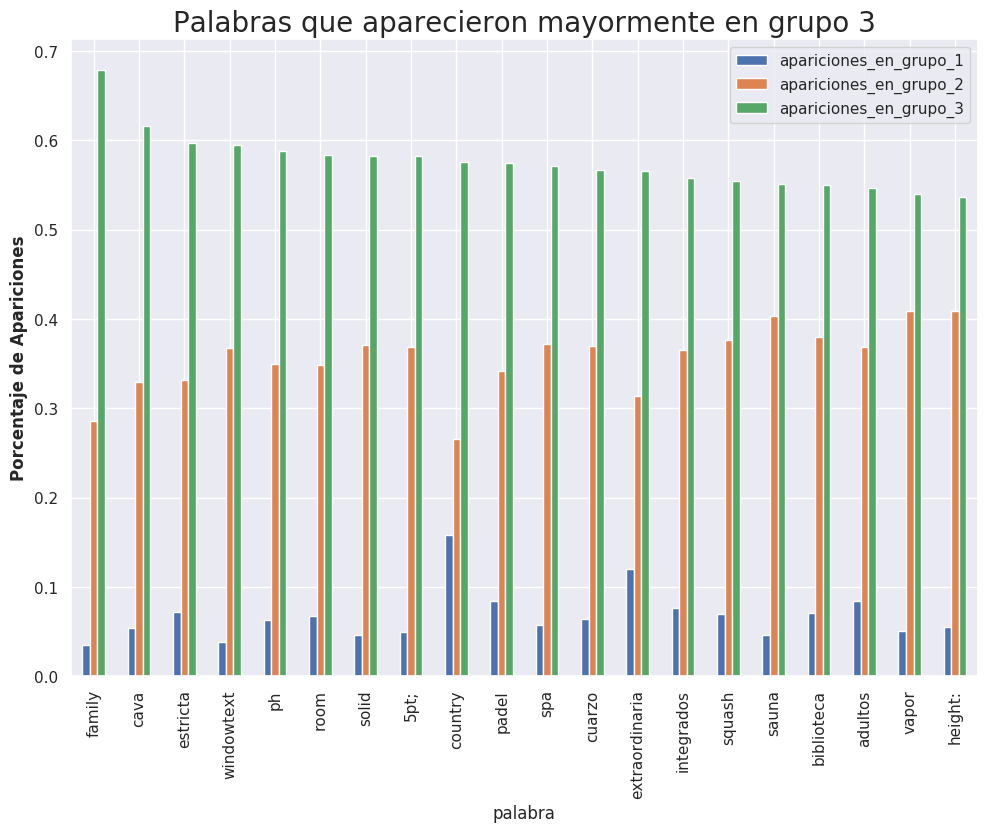

In [61]:
 ax = datos.sort_values(by='apariciones_en_grupo_3',ascending=False).head(20).plot(kind='bar', y=["apariciones_en_grupo_1", "apariciones_en_grupo_2","apariciones_en_grupo_3"])
ax.set_title('Palabras que aparecieron mayormente en grupo 3',size=20)
ax.set_ylabel('Porcentaje de Apariciones',weight='bold')

**Las palabras varían significativamente entre grupos**

Estos graficos nos muestran que hay palabras que, cuando aparecen, suelen aparecer en grupos de propiedades con determinados precios. Las palabras que contiene la descripcion me pueden ayudar a determinar el grupo de precios al que corresponde una propiedad

# ¿Hay correlacion entre las palabras del titulo de la publicacion y su precio?

In [62]:
df.shape

(240000, 4)

In [63]:
datos=contar_palabras_en_columna(df,'titulo')

In [65]:
datos.head()

,apariciones
palabra,
casa,121303
venta,104389
departamento,38074
excelente,12255
lomas,11160


### Voy a formar una lista con las palabras que me interesan (las que tuvieron mas de 800 apariciones en todos los  titulos)

In [66]:
interesantes=datos[datos['apariciones']>800]

In [67]:
interesantes.shape

(209, 1)

In [68]:
interesantes.head()

,apariciones
palabra,
casa,121303
venta,104389
departamento,38074
excelente,12255
lomas,11160


In [69]:
interesantes=interesantes.index.tolist()

### A cada publicacion le voy a agregar una columna por cada palabra de interés, con un 1 si esa publicacion tiene esa palabra en el titulo y 0 en caso contrario

In [70]:
for x in interesantes:
    df['p_'+x]=df['titulo'].str.contains(x,na=False).astype(np.int8)


In [71]:
df.head()

,id,titulo,descripcion,precio,p_casa,p_venta,p_departamento,p_excelente,p_lomas,p_col,...,p_tres,p_country,p_exclusivo,p_pesos,p_habitaciones,p_uso,p_oficinas,p_plantas,p_reforma,p_merida
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",2273000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",3600000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,1200000,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,650000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,1150000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Columns: 213 entries, id to p_merida
dtypes: int32(2), int8(209), object(2)
memory usage: 53.3+ MB


In [73]:
correlaciones=df.drop(['id','precio'],axis=1).corrwith(df['precio'])

In [74]:
correlaciones.sort_values(ascending=False,inplace=True)

Text(0.5, 0, 'Correlacion')

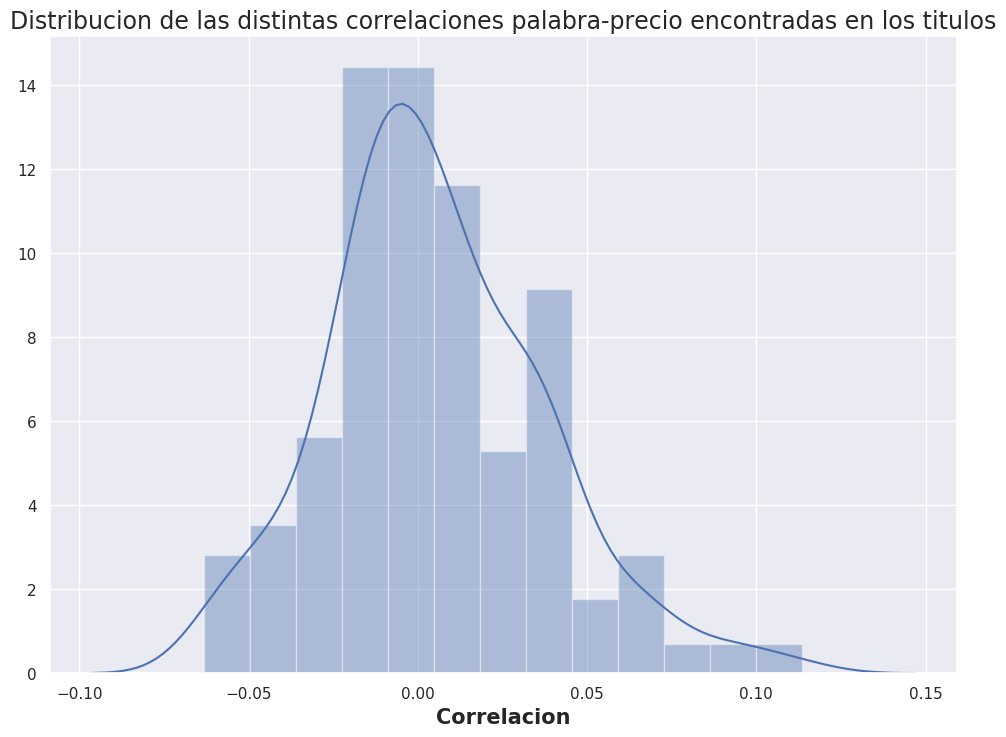

In [77]:
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plot=sns.distplot(correlaciones)
plot.set_title("Distribucion de las distintas correlaciones palabra-precio encontradas en los titulos"\
              , fontsize=17)
plot.set_xlabel('Correlacion',fontsize=15,weight='bold')


Text(0, 0.5, 'Palabras')

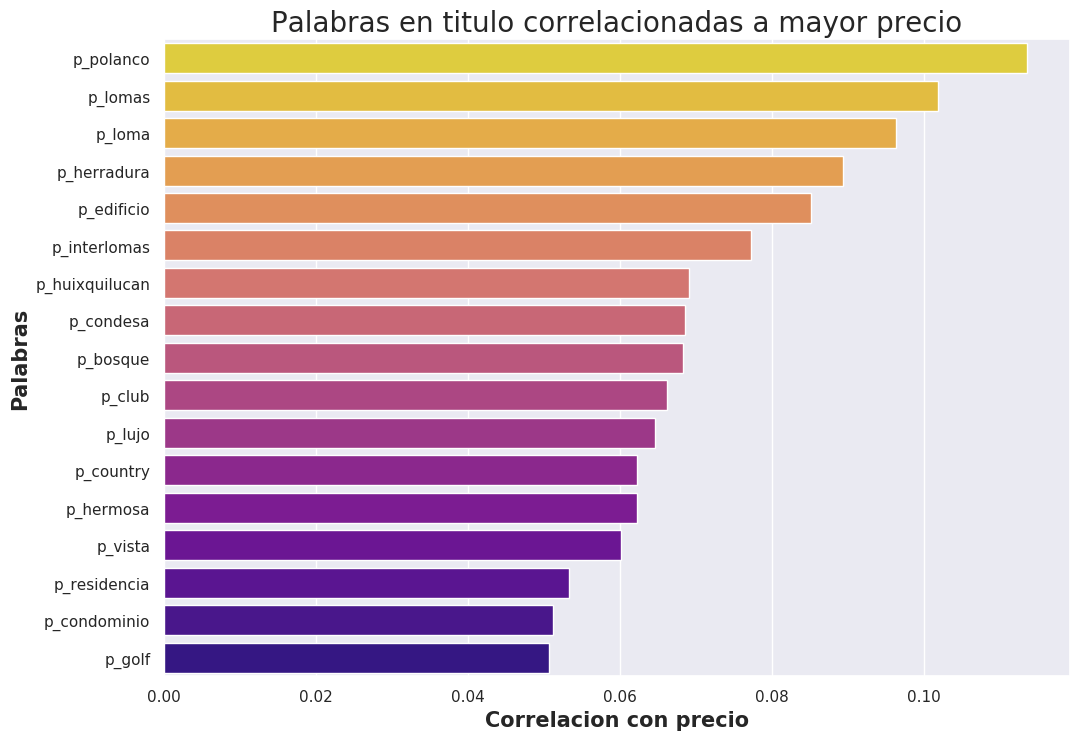

In [85]:
plot=sns.barplot(y=correlaciones[correlaciones > 0.050].index,x=correlaciones[correlaciones > 0.050].values,orient='h',palette="plasma_r")
plot.set_title('Palabras en titulo correlacionadas a mayor precio', fontsize = 20)
plot.set_xlabel('Correlacion con precio', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

Text(0, 0.5, 'Palabras')

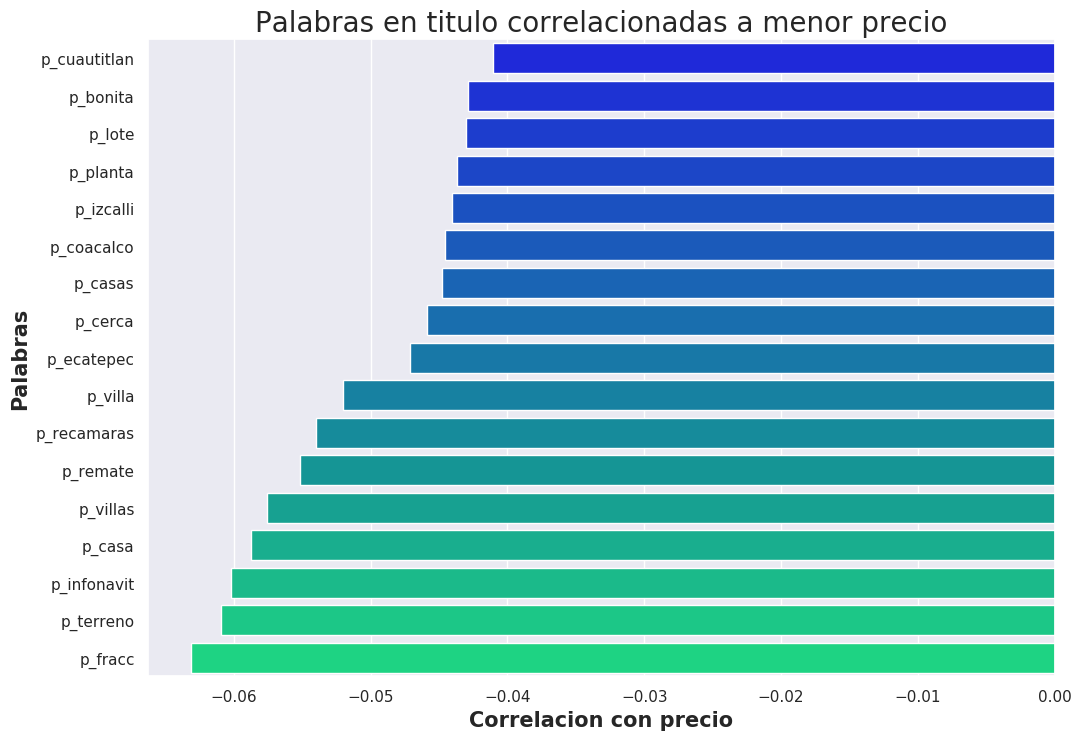

In [81]:
plot=sns.barplot(y=correlaciones[correlaciones < -0.040].index,x=correlaciones[correlaciones < -0.040].values,orient='h',palette="winter")
plot.set_title('Palabras en titulo correlacionadas a menor precio', fontsize = 20)
plot.set_xlabel('Correlacion con precio', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

# ¿Hay correlacion entre las palabras de la descripción de la publicacion y su precio?

### Hago el mismo analisis anterior pero para descripciones

In [86]:
df=df[['id','titulo','descripcion','precio']]

In [87]:
df_aux=df

In [88]:
df_aux.shape

(240000, 4)

In [89]:
datos=contar_palabras_en_columna(df_aux,'descripcion')

In [90]:
datos.shape

(208073, 1)

In [91]:
datos.head()

,apariciones
palabra,
baño,185264
cocina,155644
casa,147502
sala,128402
recamaras,113271


### Voy a formar una lista con las palabras que me interesan (las que tuvieron mas de 800 apariciones en todas las descripciones)

In [92]:
interesantes=datos[datos['apariciones']>800]

In [93]:
interesantes.shape

(1484, 1)

In [94]:
interesantes.head()

,apariciones
palabra,
baño,185264
cocina,155644
casa,147502
sala,128402
recamaras,113271


In [95]:
interesantes=interesantes.index.tolist()

### A cada publicacion le voy a agregar una columna por cada palabra de interés, con un 1 si esa publicacion tenia esa palabra en la descripcion y 0 en caso contrario

In [96]:
#Lleva su tiempo (10 minutos aprox)
for x in interesantes:
    df_aux['p_'+x]=df_aux['descripcion'].str.contains(x,na=False,regex=False).astype(np.int8)


In [97]:
df_aux.head()

,id,titulo,descripcion,precio,p_baño,p_cocina,p_casa,p_sala,p_recamaras,p_comedor,...,p_igual,p_cellspacing=0,p_remate:,p_debes,p_of,p_exclusivas,p_como:,p_antonio,p_contenida,p_2015
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",2273000,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",3600000,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,1200000,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,650000,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,1150000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
df_aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Columns: 1488 entries, id to p_2015
dtypes: int32(2), int8(1484), object(2)
memory usage: 345.2+ MB


In [99]:
correlaciones=df_aux.drop(['id','precio'],axis=1).corrwith(df_aux['precio'])

In [100]:
correlaciones.sort_values(ascending=False,inplace=True)

Text(0.5, 0, 'Correlacion')

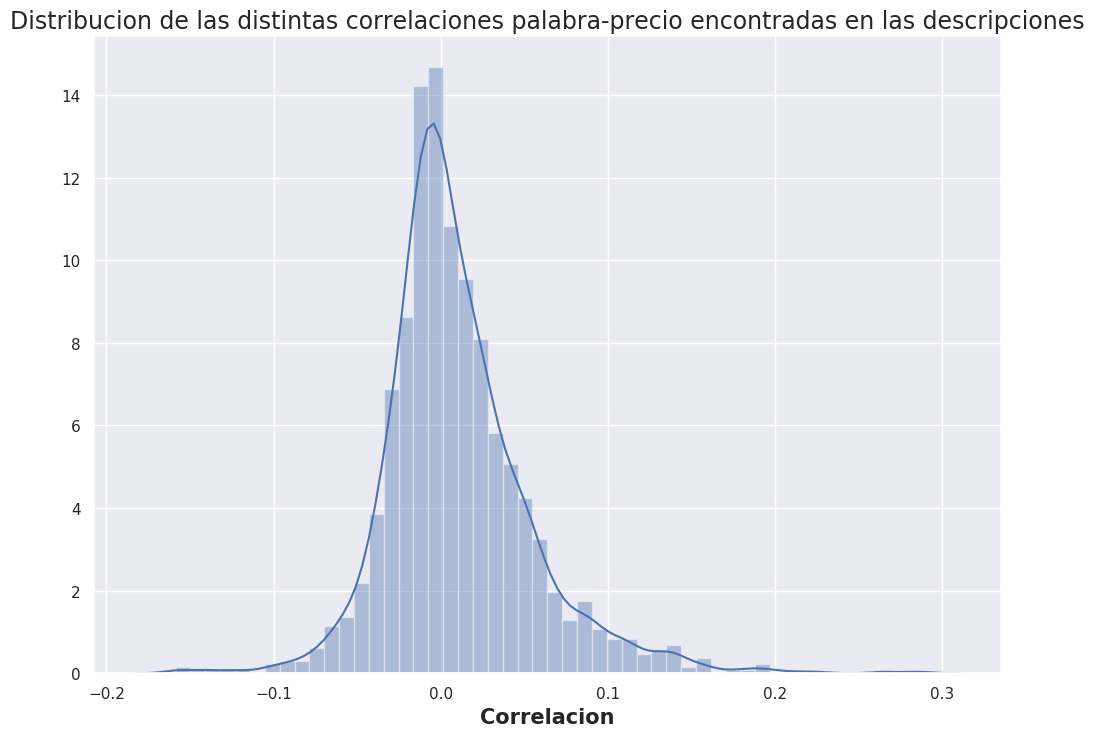

In [101]:
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plot=sns.distplot(correlaciones)
plot.set_title("Distribucion de las distintas correlaciones palabra-precio encontradas en las descripciones"\
              , fontsize=17)
plot.set_xlabel('Correlacion',fontsize=15,weight='bold')


### Vemos que estas correlaciones se distribuyen un poco más ampliamente que las de los titulos, quiere decir que hay correlaciones mas significativas

Text(0, 0.5, 'Palabras')

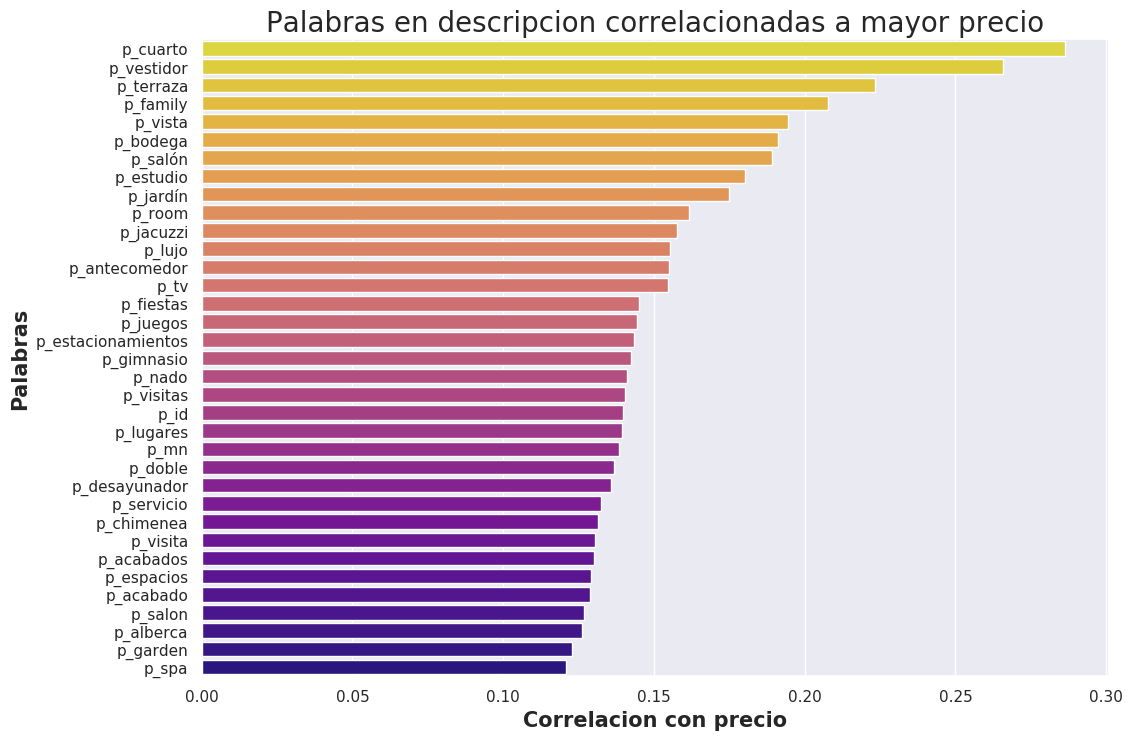

In [102]:
plot=sns.barplot(y=correlaciones[correlaciones > 0.12].index,x=correlaciones[correlaciones > 0.12].values,orient='h',palette="plasma_r")
plot.set_title('Palabras en descripcion correlacionadas a mayor precio', fontsize = 20)
plot.set_xlabel('Correlacion con precio', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

Text(0, 0.5, 'Palabras')

/home/luciano/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/luciano/.local/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


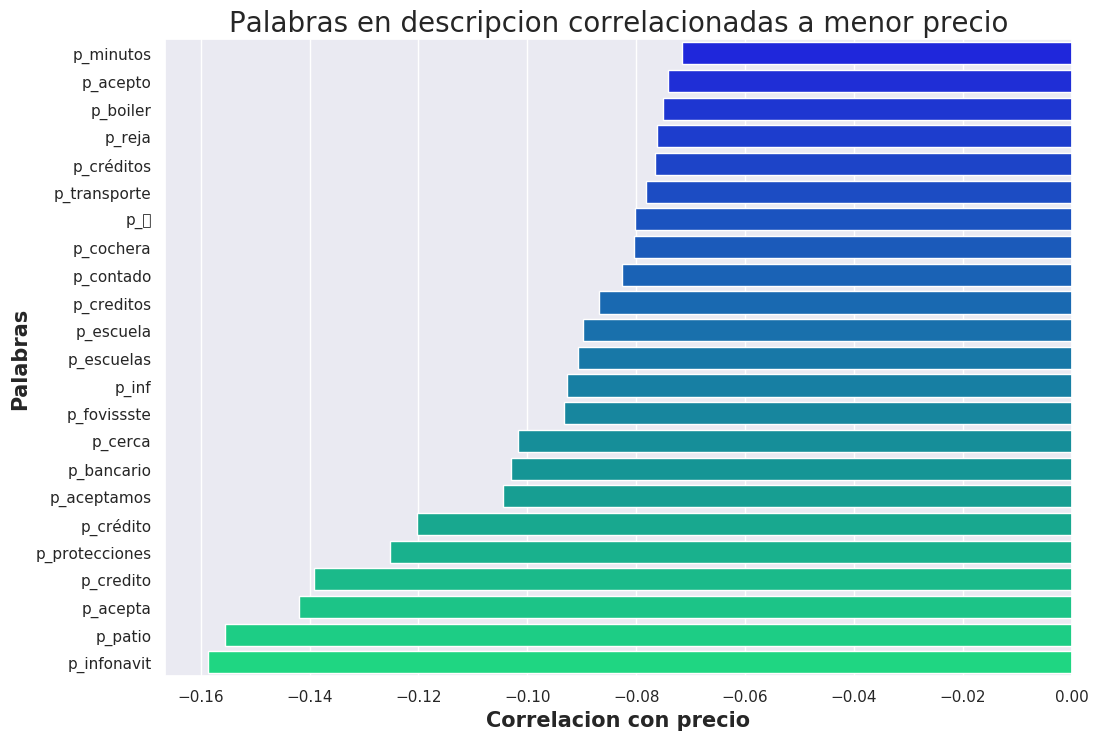

In [103]:
plot=sns.barplot(y=correlaciones[correlaciones < -0.07].index,x=correlaciones[correlaciones < -0.07].values,orient='h',palette="winter")
plot.set_title('Palabras en descripcion correlacionadas a menor precio', fontsize = 20)
plot.set_xlabel('Correlacion con precio', fontsize = 15, weight = 'bold')
plot.set_ylabel('Palabras', fontsize = 15, weight = 'bold')

**Conclusiones**: Las palabras en las descripciones se correlacionan con el precio mas significativamente que las de los titulos. Esto puede ayudar bastante a la hora de predecir precios